#  Machine Learning Online Class - Exercise 2: Logistic Regression

In this exercise, you will implement logistic regression and apply it to two different datasets. 

## Load Data

The first two columns contains the exam scores and the third column contains the label.

In [1]:
import numpy as np


data = np.loadtxt(open("ex2data1.txt", "r"), delimiter=",")
x = data[:, 0:2]
y = data[:, 2:3]

## Part 1: Plotting

The `plot_data` function below is used to plot the data loaded above

In [2]:
import matplotlib.pyplot as plt


def plot_data(x, y, show=False):
    """
    Plots the data points x and y into a new figure.

    Parameters
    ----------
    x : array
        Data on x axis. It's a m by 2 matrix, where m is the number of data samples and the number of features is 2.
    y : array
        Data on y axis, m by 1 matrix.
    show : bool
        True to show the plot immediately.
    """
    plt.figure()

    pos = np.argwhere(y.flatten() == 1)
    neg = np.argwhere(y.flatten() == 0)

    plt.plot(x[pos, 0], x[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(x[neg, 0], x[neg, 1], linestyle='', marker='o', color='y')

    if show:
        plt.show()

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples:

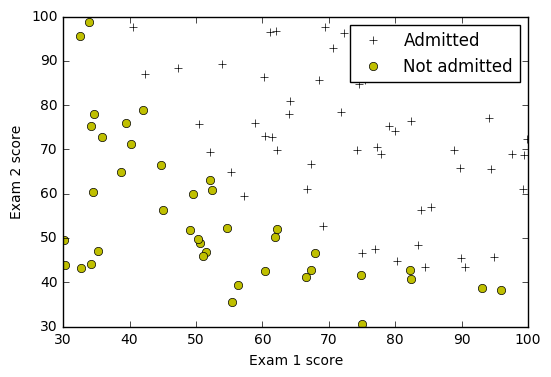

In [3]:
plot_data(x, y)
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'], loc='upper right', numpoints=1)
plt.show()

## Part 2: Compute Cost and Gradient

Initialize training parameters as follows:

In [4]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = x.shape
# Add intercept term to x and X_test
x = np.hstack((np.ones((m, 1)), x))
# Initialize fitting parameters
theta = np.zeros((n + 1, 1))  # Initialize fitting parameters

To compute the cost, we need the sigmoid function implemented first.

In [5]:
def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array_like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

The `cost_function` below compute cost and gradient for logistic regression.

In [6]:
def cost_function(theta, x, y):
    """
    Compute cost and gradient for logistic regression.

    Parameters
    ----------
    theta : ndarray
        Linear regression parameter, n by 1 matrix where n is the number of features.
    x : ndarray
        Training data, m by n matrix where m is the number of data samples.
    y : ndarray
        Labels, m by 1 matrix.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in x and y.
    grad: ndarray
        The gradient of the cost w.r.t. the parameters, n by 1 matrix.
    """
    m, n = x.shape
    theta = theta.reshape(n, 1)
    x_dot_theta = x.dot(theta)

    j = 1.0 / m * (np.dot(-y.T, np.log(sigmoid(x_dot_theta))) - np.dot((1 - y).T, np.log(1 - sigmoid(x_dot_theta))))
    j = j.flatten()

    grad = 1.0 / m * np.dot((sigmoid(x_dot_theta) - y).T, x).T

    return j[0], grad

Test the `cost_function` on initial values:

In [7]:
cost, grad = cost_function(theta, x, y)

print 'Cost at initial theta (zeros):', cost
print 'Gradient at initial theta (zeros):', grad

Cost at initial theta (zeros): 0.69314718056
Gradient at initial theta (zeros): [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


##  Optimizing using `fmin_tn`

The `fmin_tnc` function in `scipy.optmize` need a separate implementation for cost and gradient function, which are implemented as follows using the `cost_function`.

In [8]:
def cost_opt(theta, x, y):
    """
    Compute cost for logistic regression.

    Parameters
    ----------
    theta : ndarray
        Linear regression parameter, n by 1 matrix where n is the number of features.
    x : ndarray
        Training data, m by n matrix where m is the number of data samples.
    y : ndarray
        Labels, m by 1 matrix.


    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in x and y.
    """
    j, g = cost_function(theta, x, y)
    return j


def gradient_opt(theta, x, y):
    """
    Compute gradient for logistic regression.

    Parameters
    ----------
    theta : ndarray
        Linear regression parameter, n by 1 matrix where n is the number of features.
    x : ndarray
        Training data, m by n matrix where m is the number of data samples.
    y : ndarray
        Labels, m by 1 matrix.

    Returns
    -------
    grad: ndarray
        The gradient of the cost w.r.t. the parameters, n by 1 matrix.
    """
    j, g = cost_function(theta, x, y)
    return g

Train the model with `fin_tnc`:

In [9]:
import scipy.optimize as opt


result = opt.fmin_tnc(func=cost_opt, x0=theta, fprime=gradient_opt, args=(x, y))
theta = result[0].T
print 'Cost at theta found by fminunc:',  cost_opt(theta, x, y)
print 'theta:', theta

Cost at theta found by fminunc: 0.203497701589
theta: [-25.1613187    0.20623159   0.20147149]


The `plot_decision_boundary` function below helps to plot the decision boundary.

In [10]:
import matplotlib.pyplot as plt


def plot_decision_boundary(theta, x, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.

    Parameters
    ----------
    theta : ndarray
        Linear regression parameter, n by 1 matrix where n is the number of features.
    x : ndarray
        Training data, m by n matrix where m is the number of data samples.
    y : ndarray
        Labels, m by 1 matrix.
    """
    if x.shape[1] <= 3:
        plot_x = np.array([np.amin(x[:, 1]) - 2, np.amax(x[:, 1]) + 2])
        plot_y = -1.0 / theta[2] * (theta[1] * plot_x + theta[0])
        print plot_x, plot_y
        plt.plot(plot_x, plot_y)


Plot the boundary:

[  28.05882245  101.8278578 ] [ 96.16598095  20.65402814]


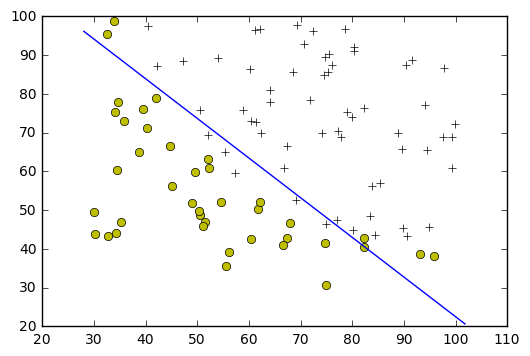

In [11]:
plot_data(x[:, 1:], y)
plot_decision_boundary(result[0], x, y)
plt.show()

## Part 4: Predict and Accuracies


Predict probability for a student with score 45 on exam 1 and score 85 on exam 2: 

In [12]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print 'For a student with scores 45 and 85, we predict an admission probability of', prob

For a student with scores 45 and 85, we predict an admission probability of 0.77629062453


The `predict` function below predicts the input data with learned logistic regression parameters.

In [13]:
def predict(theta, x):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters theta.

    Parameters
    ----------
    theta : ndarray
        Linear regression parameter, n by 1 matrix where n is the number of features.
    x : ndarray
        Training data, m by n matrix where m is the number of data samples.

    Returns
    -------
    ndarray
        The predictions for X using a threshold at 0.5, m by 1 matrix.
    """
    p = sigmoid(x.dot(theta)) >= 0.5
    p.resize(len(p), 1)
    return p.astype(int)

Compute accuracy on our training set: 

In [14]:
p = predict(theta, x)
print 'Train Accuracy:', np.mean(p == y) * 100

Train Accuracy: 89.0
